For those of you who are about to start an airbnb business in Melbourne and professional airbnb hosts,I will overview the Melbourne airbnb market, propose price setting suggestions by recognizing important features that affect price and their relationships based on data visualization and modeling of the dataset from the insightsairbnb website.Total 17,551 obeservations and 74 variables recorded Melbourne airbnb information from 2009 to present.



## Dataset overview

In [1]:
# prepare
import pandas as pd
import warnings
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10,10]
sns.set_theme(style = 'darkgrid')

In [2]:
# read dataset
df_melb = pd.read_csv('listings.csv.gz',compression='gzip')
df_melb.shape #(17551,74)
df_melb.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1273635,https://www.airbnb.com/rooms/1273635,20220606014126,2022-06-06,Private double room in Melbourne,A comfortable double bedroom with private bath...,Within 100 metres of our home is the Donburn s...,https://a0.muscache.com/pictures/f79ef227-3482...,6692322,https://www.airbnb.com/users/show/6692322,Barry,2013-06-02,"Melbourne, Victoria, Australia",I am from Melbourne Australia intending to vis...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/6692322/profi...,https://a0.muscache.com/im/users/6692322/profi...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Doncaster East, Victoria, Australia",Manningham,NaN,-37.78438,145.16477,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$106.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,29,59,89,179,2022-06-06,1,0,0,2019-06-18,2019-06-18,5.0,5.00,5.00,5.00,5.00,5.00,5.00,NaN,t,1,0,1,0,0.03
1,1273768,https://www.airbnb.com/rooms/1273768,20220606014126,2022-06-06,Fortnightly or Monthly Rental close to CBD,Compact apartment with all the necessities for...,Great cafes just a short stroll from the front...,https://a0.muscache.com/pictures/19203077/cfc3...,6933179,https://www.airbnb.com/users/show/6933179,Alex,2013-06-16,"Docklands, Victoria, Australia",Work at Icehouse Docklands Victoria\r\n,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6933179/profi...,https://a0.muscache.com/im/users/6933179/profi...,Collingwood/Fitzroy,1.0,1.0,"['email', 'phone']",t,t,"Fitzroy, Victoria, Australia",Yarra,NaN,-37.80759,144.97821,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Extra pillows and bla...",$86.00,14,1125,14,14,1125,1125,14.0,1125.0,NaN,t,1,1,30,305,2022-06-06,47,6,0,2013-07-19,2022-03-06,4.6,4.87,4.67,4.93,4.83,4.93,4.72,NaN,f,1,1,0,0,0.43


In [3]:
df_melb.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    17551
license                                         17551
bathrooms                                       17551
calendar_updated                                17551
host_neighbourhood                               9014
host_about                                       7445
neighborhood_overview                            6794
neighbourhood                                    6793
host_response_rate                               6750
host_response_time                               6750
host_acceptance_rate                             6198
review_scores_location                           3928
review_scores_value                              3928
review_scores_checkin                            3928
review_scores_accuracy                           3924
review_scores_communication                      3922
review_scores_cleanliness                        3921
reviews_per_month                                3638
first_review                

In [4]:
df_list = pd.read_csv('listings.csv')
df_list.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,633258,Hip sun drenched Windsor apartment,440653,Rob,NaN,Stonnington,-37.85437,144.99488,Entire home/apt,74,2,17,2018-06-28,0.14,1,0,0,NaN
1,1273635,Private double room in Melbourne,6692322,Barry,NaN,Manningham,-37.78438,145.16477,Private room,106,1,1,2019-06-18,0.03,1,179,0,NaN


In [5]:
# dataset overview
df_melb.duplicated().sum() #0
#df_melb.info()

0

In [6]:
#Sort out the null value
df_list.isnull().sum().sort_values(ascending=False) 

license                           17551
neighbourhood_group               17551
reviews_per_month                  3638
last_review                        3638
host_name                             3
name                                  2
number_of_reviews                     0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

In [7]:
df_melb.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.755100e+04,1.755100e+04,1.755100e+04,17548.000000,17548.000000,0.0,17551.000000,17551.000000,17551.000000,0.0,16781.000000,17299.000000,17551.000000,17551.000000,17551.000000,17551.000000,1.755100e+04,1.755100e+04,17551.000000,1.755100e+04,0.0,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,17551.000000,13913.000000,13627.000000,13630.000000,13623.000000,13629.000000,13623.000000,13623.000000,0.0,17551.000000,17551.00000,17551.000000,17551.000000,13913.000000
mean,6.516760e+16,2.022061e+13,1.206152e+08,12.565478,12.565478,NaN,-37.828320,145.018099,3.463506,NaN,1.678267,2.039713,7.469033,712.960857,6.520255,7.680075,1.591452e+06,1.591466e+06,7.043217,1.591460e+06,NaN,8.496325,20.249672,34.472623,125.957153,29.351661,6.374224,0.722238,4.596528,4.749018,4.649997,4.798507,4.812165,4.830471,4.668715,NaN,9.727708,7.78514,1.822859,0.057262,1.154029
std,1.861660e+17,0.000000e+00,1.200970e+08,42.120121,42.120121,NaN,0.075580,0.149607,2.298797,NaN,0.990598,1.602506,38.971962,5581.631627,34.355144,37.545211,5.842543e+07,5.842543e+07,35.422299,5.842543e+07,NaN,10.584899,22.348368,34.950649,135.736778,56.518269,13.329461,1.635519,0.811534,0.461130,0.525236,0.425772,0.428641,0.350365,0.477500,NaN,24.892745,19.82251,11.847190,0.608461,1.556148
min,9.835000e+03,2.022061e+13,9.082000e+03,0.000000,0.000000,NaN,-38.325610,144.506620,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,1.000000,0.00000,0.000000,0.000000,0.010000
25%,1.867477e+07,2.022061e+13,2.408765e+07,1.000000,1.000000,NaN,-37.856820,144.957715,2.000000,NaN,1.000000,1.000000,1.000000,62.000000,1.000000,1.000000,1.300000e+02,3.650000e+02,1.000000,2.508500e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.580000,4.710000,4.530000,4.780000,4.810000,4.800000,4.590000,NaN,1.000000,0.00000,0.000000,0.000000,0.150000
50%,3.176048e+07,2.022061e+13,7.351416e+07,1.000000,1.000000,NaN,-37.819620,144.979760,2.000000,NaN,1.000000,2.000000,2.000000,1125.000000,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,NaN,2.000000,11.000000,28.000000,77.000000,6.000000,0.000000,0.000000,4.830000,4.900000,4.810000,4.940000,4.960000,4.930000,4.790000,NaN,1.000000,1.00000,0.000000,0.000000,0.630000
75%,4.688197e+07,2.022061e+13,1.849433e+08,5.000000,5.000000,NaN,-37.800942,145.030740,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,17.000000,40.000000,68.000000,257.000000,31.000000,7.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,NaN,5.000000,3.00000,1.000000,0.000000,1.610000
max,6.424434e+17,2.022061e+13,4.621531e+08,477.000000,477.000000,NaN,-37.486950,145.850230,16.000000,NaN,15.000000,50.000000,1125.000000,730365.000000,1000.000000,1125.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,725.000000,356.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5

In [8]:
df_melb.describe(include='object')

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,17551,17551,17549,17084,10757,17551,17551,17548,17548,17534,10106,10801,10801,11353,17548,17548,17548,8537,17551,17548,17548,10758,17551,17551,17551,17531,17551,17551,17551,17551,13913,13913,17551
unique,17551,1,17140,16286,9252,17158,11209,4704,3386,1209,5781,4,59,96,2,11095,11095,100,8,2,2,507,30,87,4,34,16459,878,2,1,2820,1992,2
top,https://www.airbnb.com/rooms/1273635,2022-06-06,墨尔本东北区Bundoora温馨独栋别墅，房间干净整齐、设施齐全、交通方便、高速网络、高档床...,Rise and shine with the best of Melbourne on y...,Melbourne - Voted most livable city in the wor...,https://a0.muscache.com/pictures/e7903221-b790...,https://www.airbnb.com/users/show/90729398,Valeria,2016-08-19,"Melbourne, Victoria, Australia",We specialise in offering a new and unique opp...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/ee348...,https://a0.muscache.com/im/pictures/user/ee348...,Central Business District,"['email', 'phone']",t,t,"Melbourne, Victoria, Australia",Melbourne,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",$100.00,t,2022-06-06,2022-04-11,2022-05-22,f
freq,1,17551,15,18,56,7,169,169,175,4887,169,7527,7706,3142,14545,169,169,1503,12748,17416,14786,1639,5188,6905,11996,8474,44,380,17508,17551,81,518,10855


## Preprocess


Fill NA

In [9]:
#fill 3 null value by the first review date
df_melb.loc[df_melb['host_since'].isnull(),'host_since'] = df_melb.loc[df_melb['host_since'].isnull()]['first_review']

In [10]:
# fill null value of bathrooms text by frequency value
df_melb['bathrooms_text'].isnull().sum() # 20
df_melb['bathrooms_text'].fillna('1 bath',inplace=True)
#df_melb['bathrooms_text'].isnull().sum() #0

In [11]:
# fill missing value by median value 
df_melb['host_listings_count'].count() # 3 missing values
df_melb['host_listings_count'].median() # 1
df_melb['host_listings_count'].fillna(1,inplace=True)

In [12]:
df_melb['host_is_superhost'].count() # 3 missing values
df_melb['host_is_superhost'].fillna('f',inplace=True)


Format convert

In [13]:
# Split year and month
df_melb['date'] = pd.to_datetime(df_melb['host_since'])
df_melb['year'],df_melb['month'] = df_melb['date'].apply(lambda x: int(x.year)),df_melb['date'].apply(lambda x: int(x.month))

In [14]:
# Convert price format from string with $ to float without $
df_melb[['price']] = df_melb[['price']].replace('[\$,]','',regex=True).astype(float)

In [15]:
# convert string to int 
df_melb['accommodates'] = df_melb['accommodates'].astype(int)

Transfer date into days until now

In [16]:
# change date into days until now
today = pd.to_datetime(datetime.date.today())
def getdays(hostsince):
    days = hostsince-today
    return days.days
df_melb['days']= df_melb['date'].apply(lambda x: getdays(x))

Outliers dealing

<AxesSubplot:xlabel='price', ylabel='Count'>

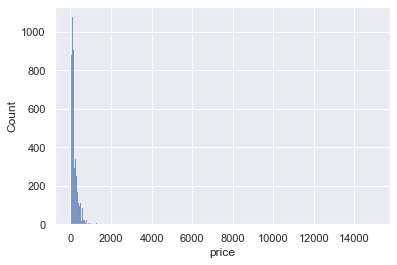

In [17]:
# To check price distribution
sns.histplot(x='price',data=df_melb)

In [18]:
# To calculate standard deviation of price
x = df_melb['price'].to_numpy()
threshold_sigma = []
observations = []
percentage = []
sigma_range = [1,1.5,2,2.5,3]
for i in sigma_range:
    sigma_control = round(x.mean() + i * x.std(),2)
    threshold_sigma.append(sigma_control)
    price = df_melb[df_melb['price']>sigma_control]
    numbers = price['id'].count()
    observations.append(numbers)
    percentage_value = round((numbers)/17551,2)
    percentage.append(percentage_value)
    
range_dict = {'σ':sigma_range,'threshold_value':threshold_sigma,'above_numbers':observations,'percentage':percentage}
range_df = pd.DataFrame(range_dict)
range_df

,σ,threshold_value,above_numbers,percentage
0,1.0,677.48,569,0.03
1,1.5,910.28,334,0.02
2,2.0,1143.08,214,0.01
3,2.5,1375.87,165,0.01
4,3.0,1608.67,129,0.01


<AxesSubplot:xlabel='price', ylabel='Count'>

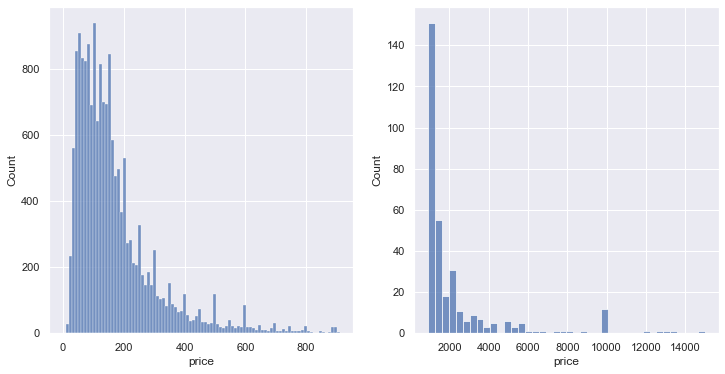

In [19]:
below = df_melb[df_melb['price']<=910.28]
over = df_melb[df_melb['price']>910.28]
fig,axs = plt.subplots(1,2,figsize=(12,6))
sns.histplot(x='price',data=below,ax=axs[0])
sns.histplot(x='price',data=over,ax=axs[1])

<AxesSubplot:xlabel='price'>

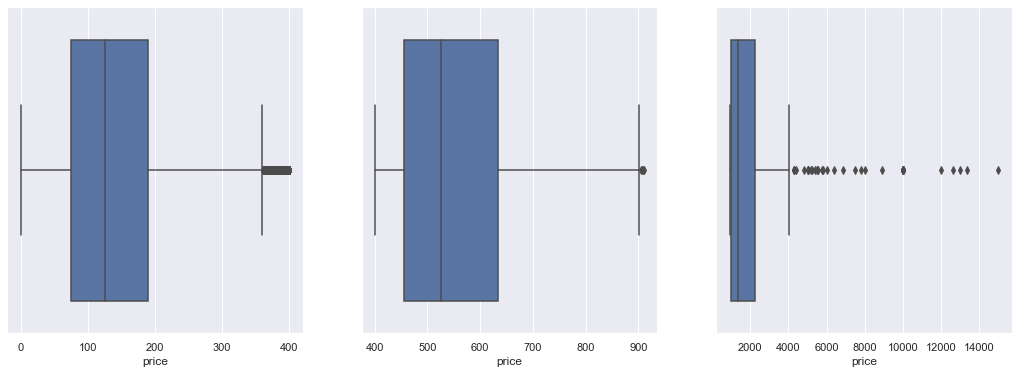

In [20]:
majority = df_melb[df_melb['price']<=400] # 16053  91% $125

minority = df_melb[(df_melb['price']>400)&(df_melb['price']<=910.28)] # 1164 6%  $525

luxury = df_melb[df_melb['price']>910.28] #334 2%  $1359.5

fig,axs = plt.subplots(1,3,figsize=(18,6))
sns.boxplot(x='price',data=majority,ax=axs[0]) 
sns.boxplot(x='price',data=minority,ax=axs[1]) 
sns.boxplot(x='price',data=luxury,ax=axs[2])

It can be clearly seen that the airbnb price was skewed to the right, 91% of the airbnb prices were less than 400 dollar and the median price was 125 dollar, of which more than 75% were less than 200 dollar. Compared them, only 6% of the Airbnb were between 400 dollar and 910 dollar, of which 75% were below 650 dollar. But there were 334 airbnbs higher than 910 dollar accounting for 2%, especially 44 Airbnbs with prices above 4000 dollar. I will deeply looked into them then.

Deeply look at the most expensive airbnbs

In [21]:
df_melb[df_melb['price']>4000]['room_type'].value_counts()

Entire home/apt    27
Private room       15
Hotel room          1
Shared room         1
Name: room_type, dtype: int64

In [22]:
df_melb[(df_melb['room_type']=='Shared room')&(df_melb['price']>4000)] # No review,No host_listing_count,$6000

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,year,month,days
12207,42607458,https://www.airbnb.com/rooms/42607458,20220606014126,2022-06-06,Safe Female Only Flat,Females only. <br />It’s has a tree house vib...,"Laundromats if needed, a chippy and grocery st...",https://a0.muscache.com/pictures/8de62c5a-5e14...,182342439,https://www.airbnb.com/users/show/182342439,Emma,2018-04-04,"Helensvale, Queensland, Australia",NaN,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/06755...,https://a0.muscache.com/im/pictures/user/06755...,NaN,0.0,0.0,"['email', 'phone']",t,f,"Hawthorn, Victoria, Australia",Boroondara,NaN,-37.82769,145.02821,Shared room in townhouse,Shared room,2,NaN,0 shared baths,1.0,NaN,"[""TV"", ""Long term stays allowed"", ""Hair dryer""...",6000.0,1,1000,1,1,1125,1125,1.0,1125.0,NaN,t,29,59,89,364,2022-06-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN,2018-04-04,2018,4,-1621


In [23]:
df_melb[(df_melb['room_type']=='Hotel room')&(df_melb['price']>4000)] # $9999

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,year,month,days
10204,37725731,https://www.airbnb.com/rooms/37725731,20220606014126,2022-06-06,2 Bedroom Apartment,<b>The space</b><br />Whether you're looking t...,Mantra St Kilda Road is only minutes to the CB...,https://a0.muscache.com/pictures/f656ca71-039b...,284911541,https://www.airbnb.com/users/show/284911541,Andrew,2019-08-12,AU,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/edea4...,https://a0.muscache.com/im/pictures/user/edea4...,Prahran/Windsor,2.0,2.0,"['email', 'phone']",t,t,"Melbourne, Victoria, Australia",Port Phillip,NaN,-37.84718,144.9787,Room in serviced apartment,Hotel room,5,NaN,1 private bath,2.0,3.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",9999.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,1,276,2022-06-06,23,0,0,2019-10-06,2021-05-15,4.65,4.65,4.87,4.65,4.48,4.87,4.61,NaN,f,2,0,0,0,0.71,2019-08-12,2019,8,-1126


In [24]:
df_melb[(df_melb['room_type']=='Private room')&(df_melb['price']>4000)]['host_id'].value_counts() # host_id:318856825 $9999

318856825    5
96127123     1
105279173    1
63405705     1
158245484    1
149641000    1
248358601    1
269714702    1
192661274    1
108931465    1
32877188     1
Name: host_id, dtype: int64

In [25]:
df_melb[(df_melb['room_type']=='Entire home/apt')&(df_melb['price']>4000)].head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,year,month,days
1395,7490588,https://www.airbnb.com/rooms/7490588,20220606014126,2022-06-06,Sanitised* quiet CBD 2 bed apt 4beds,pool area closed temporarily.<br />Right oppos...,"Opposite Southern Cross Train station, next to...",https://a0.muscache.com/pictures/c23102c5-7783...,27519695,https://www.airbnb.com/users/show/27519695,Rachel & Ivan,2015-02-10,"Box Hill North, Victoria, Australia",I use Airbnb frequently when I travel. I under...,a few days or more,33%,33%,f,https://a0.muscache.com/im/pictures/user/67464...,https://a0.muscache.com/im/pictures/user/67464...,Central Business District,6.0,6.0,"['email', 'phone', 'work_email']",t,t,"Melbourne, Victoria, Australia",Melbourne,NaN,-37.81474,144.95128,Entire rental unit,Entire home/apt,8,NaN,1 bath,2.0,2.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",6388.0,400,900,400,400,1125,1125,400.0,1125.0,NaN,t,30,60,90,90,2022-06-06,401,0,0,2015-07-22,2020-06-29,4.49,4.65,4.39,4.64,4.80,4.87,4.58,NaN,f,4,4,0,0,4.79,2015-02-10,2015,2,-2770
1520,7725883,https://www.airbnb.com/rooms/7725883,20220606014126,2022-06-06,Home of Peace,This wonderful living place is close to South ...,"South Yarra is an inner suburb of Melbourne, V...",https://a0.muscache.com/pictures/6794082a-7dd9...,40595688,https://www.airbnb.com/users/show/40595688,金平,2015-08-05,"Melbourne, Victoria, Australia",NaN,within a few hours,100%,50%,f,https://a0.muscache.com/im/pictures/user/75365...,https://a0.muscache.com/im/pictures/user/75365...,South Yarra,2.0,2.0,"['email', 'phone']",t,t,"South Yarra, Victoria, Australia",Stonnington,NaN,-37.84042,144.99802,Entire condo,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""Free street parking"", ""Extra pillows and bla...",8888.0,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,30,60,90,365,2022-06-06,14,0,0,2019-12-29,2020-03-05,4.58,4.58,4.33,4.75,4.92,4.75,4.58,NaN,f,1,1,0,0,0.47,2015-08-05,2015,8,-2594
2786,12719024,https://www.airbnb.com/rooms/12719024,20220606014126,2022-06-06,"Tidy, pet friendly on request","Close to Train, Tram, Bikepaths. 13km from Mel...",NaN,https://a0.muscache.com/pictures/43ef7cc1-41fc...,69151339,https://www.airbnb.com/users/show/69151339,Shae,2016-04-27,Australia,After a recent tragedy I have taken 12 months ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3b53d...,https://a0.muscache.com/im/pictures/user/3b53d...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Darebin,NaN,-37.72707,144.99738,Entire home,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""TV"", ""Long term stays allowed"", ""Wifi"", ""Kit...",12624.0,10,100,10,10,100,100,10.0,100.0,NaN,t,0,0,0,0,2022-06-06,1,0,0,2016-04-30,2016-04-30,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.01,2016-04-27,20

In [26]:
luxury['host_name'].value_counts()

Luxico Holiday Homes    18
Michelle                 8
Jean                     8
Steve And Janet          6
Platinum Apartments      6
                        ..
Teri                     1
Nic                      1
Bruce                    1
Paris                    1
Holly                    1
Name: host_name, Length: 210, dtype: int64

As for airbnbs over 4000 dollar,there were 1 shared room, 1 hotel room, 15 private rooms and 27 entire houses/apartments. I found some interesting price patterns like 8888 dollar or 9999 dollar. some of these listings did not have reviews, some of these had reviews before, but not available any more in 3 months, and others still run as normal.

The quality of dataset looks good. Total 17,751 observations and 77 variables. But some features like host_neighbourhood has more than a half missing value, I will not consider them. 

There were 334 airbnbs distributed outside 1.5 standard deviation of price but only accounts for 2% of total observations. As price varied hugely, I will regard them as outliers. Airbnb hosts determined price sometimes by their own consideration. 

In addition, preprocession has been done,including, Filled the only 1 missing value of host since date by first_review. And filled the 20 missing 'bathrooms_text'by frequency value 'Shared half-bath'. Extracted the year and month value as well and extract digit value without '$' from price. Then convert string data type of 'accommodates' to integer as well. At last, no duplicated value.

## Overview Melbourne Airbnb market

### Define functions

In [27]:
# Get count data and merge it with geomap data.
def get_Countmap(df,df_map):
    df_count = df['neighbourhood'].value_counts().reset_index()
    df_count = df_count.rename(columns={'index':'neighbourhood','neighbourhood':'counts'})
    df_count['counts'] = df_count['counts'].astype(int)
    count_region = df_map.merge(df_count,on = 'neighbourhood',how='left')
    return count_region

# Get price data and merge it with geomap data.
def get_Pricemap(df,df_map):
    df_price = df.groupby(['neighbourhood'])['price'].median().reset_index()
    price_region = df_map.merge(df_price,on='neighbourhood',how='left')
    return price_region

# Draw count heatmap
def draw_countmap(df,a,classification,color,titlename):
    df.plot(column = 'counts',ax=a,legend=True,cmap=color,scheme = 'Percentiles',classification_kwds={'pct':classification})
    a.set_title(titlename,fontsize=20) 
    
#Draw price heatmap
def draw_pricemap(df,a,classification,color,titlename):
    df.plot(column = 'price',ax=a,legend=True,cmap=color,scheme = 'Percentiles',classification_kwds={'pct':classification})
    a.set_title(titlename,fontsize=20)  

# get bath number
def get_bath_number(value):
    if value == 1:
        return 1
    elif 'Half-bath' in value:
        return 0.5
    elif 'half-bath' in value:
        return 0.5
    else:
        m = re.search('(\d+)', value)
        return m.group(0)

### Distribution by Regions

In [28]:
# Filter dataframe
df_region = df_list[['id','neighbourhood','room_type','price']]   
year = below[['id','year']]
df_region = df_region.merge(year,on='id',how='right')
df_region.head(2)

,id,neighbourhood,room_type,price,year
0,1273635,Manningham,Private room,106,2013
1,1273768,Yarra,Entire home/apt,86,2013


In [29]:
df_region.describe()

,id,price,year
count,1.721700e+04,17217.000000,17217.000000
mean,6.444793e+16,170.957310,2016.085148
std,1.853004e+17,138.602334,2.496619
min,9.835000e+03,0.000000,2009.000000
25%,1.865584e+07,80.000000,2014.000000
50%,3.157950e+07,134.000000,2016.000000
75%,4.682072e+07,208.000000,2018.000000
max,6.424434e+17,910.000000,2022.000000


In [30]:
df_region.describe(include='object')

,neighbourhood,room_type
count,17217,17217
unique,30,4
top,Melbourne,Entire home/apt
freq,5107,11708


In [31]:
# get melbourne geojson data
melb_map = geopandas.read_file('neighbourhoods.geojson')

In [32]:
#draw airbnb numbers and price in regions by function
countmap = get_Countmap(df_region,melb_map)
count_titlename= 'Regional Distribution of Airbnb Numbers'
pricemap = get_Pricemap(df_region,melb_map)
price_titlename = 'Regional Distribution of Airbnb Price'
classification = [1,25,50,75,100]
color='Reds'

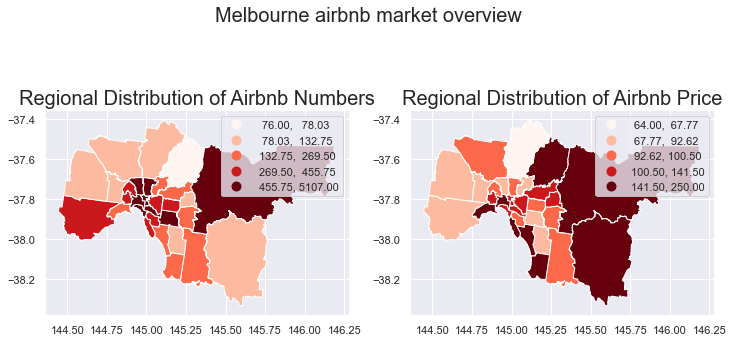

In [33]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Melbourne airbnb market overview',fontsize=20)
draw_countmap(countmap,axs[0],classification,color,count_titlename)
draw_pricemap(pricemap,axs[1],classification,color,price_titlename)

Text(0.5, 1.0, 'By Price')

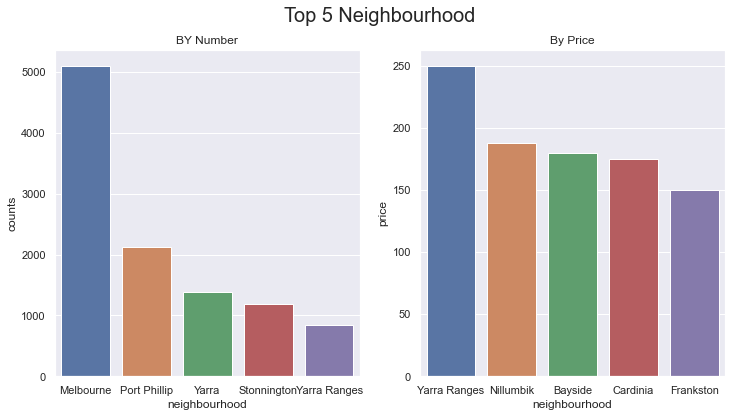

In [34]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Top 5 Neighbourhood",fontsize=20)
countbar = countmap.sort_values(by=['counts'],ascending=False)[:5]
pricebar = pricemap.sort_values(by=['price'],ascending=False)[:5]
sns.barplot(x='neighbourhood',y='counts',data=countbar,ax=axs[0]).set_title("BY Number")
sns.barplot(x='neighbourhood',y='price',data=pricebar,ax=axs[1]).set_title("By Price")

Different council areas had the different airbnb numbers and median price. Most airbnbs located in the centre and east of Melbourne. Among them, the number of Airbnbs in the Melbourne City Council District was much higher than that of other City Council districts. In addition, airbnb prices in Melbourne's east were the highest. Airbnbs along the coast were also the most expensive.

In terms of specific council areas, the Yarra Ranges had the highest median airbnb prices, with Bayside a close second.

However, the airbnb located in the north of Melbourne were not developed in terms of quantity and price.

### Distribution by Room type

In [35]:
df_room = below[['id','room_type','price','bathrooms_text','bedrooms','accommodates','beds']]
roomtype_count = df_room['room_type'].value_counts()
roomtype_total = df_room['room_type'].count()

In [36]:
def make_autopct(value):
    def my_autopct(pct):
        total = sum(value)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, 'Airbnb price in different room type')

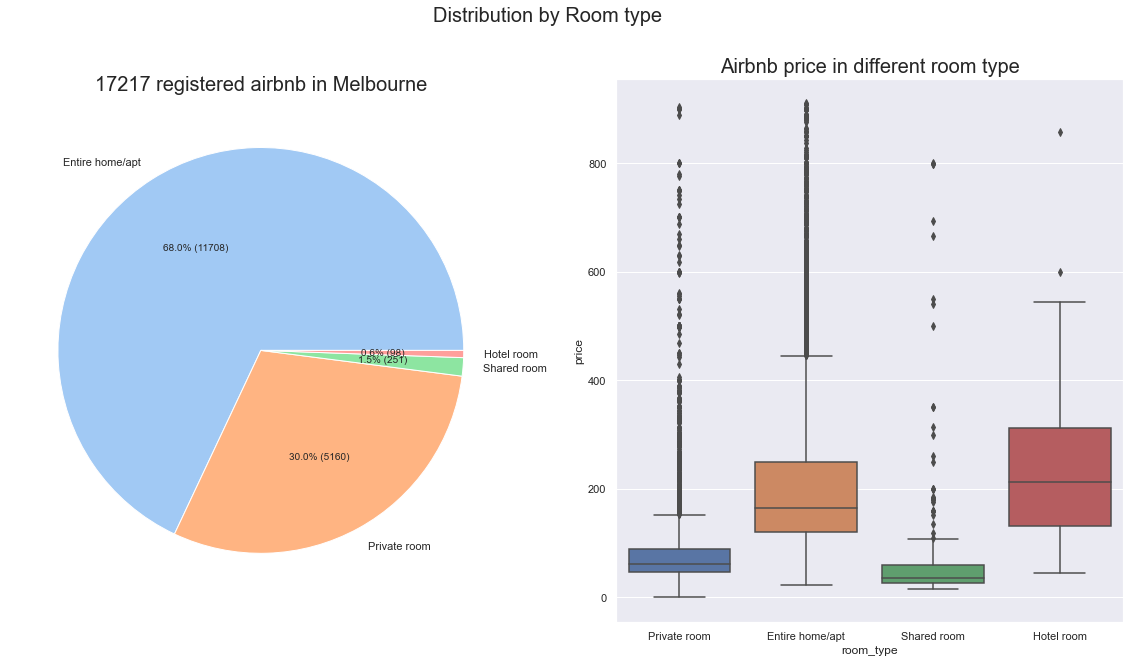

In [79]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Distribution by Room type",fontsize=20)
colors = sns.color_palette('pastel')[0:4]
labels=['Entire home/apt','Private room','Shared room','Hotel room']
axs[0].pie(roomtype_count,labels = labels,colors=colors,autopct=make_autopct(roomtype_count))
axs[0].set_title('%d registered airbnb in Melbourne' %roomtype_total, fontsize=20)

sns.boxplot(x='room_type',y='price',data = df_room, ax=axs[1])
axs[1].set_title('Airbnb price in different room type',fontsize=20)

The median price varies in terms of airbnb room types. Entire houses or apartments account for the most room types on Airbnb, followed by private rooms. Hotel rooms are minimal. But the median price of a hotel room is the most expensive. Shared rooms are the cheapest.

### Distribution by Registered time

In [38]:
df_dy = below[['id','year','month','price','host_since','first_review','last_review']]
count_year = df_dy.groupby('year')['id'].count().reset_index()
price_year = df_dy.groupby('year')['price'].median().reset_index()
count_year = count_year.rename(columns={'id':'number'})

count_month = df_dy.groupby('month')['id'].count().reset_index()
price_month = df_dy.groupby('month')['price'].median().reset_index()
count_month = count_month.rename(columns={'id':'number'})

Text(0.5, 1.0, 'Airbnb Median price by Month')

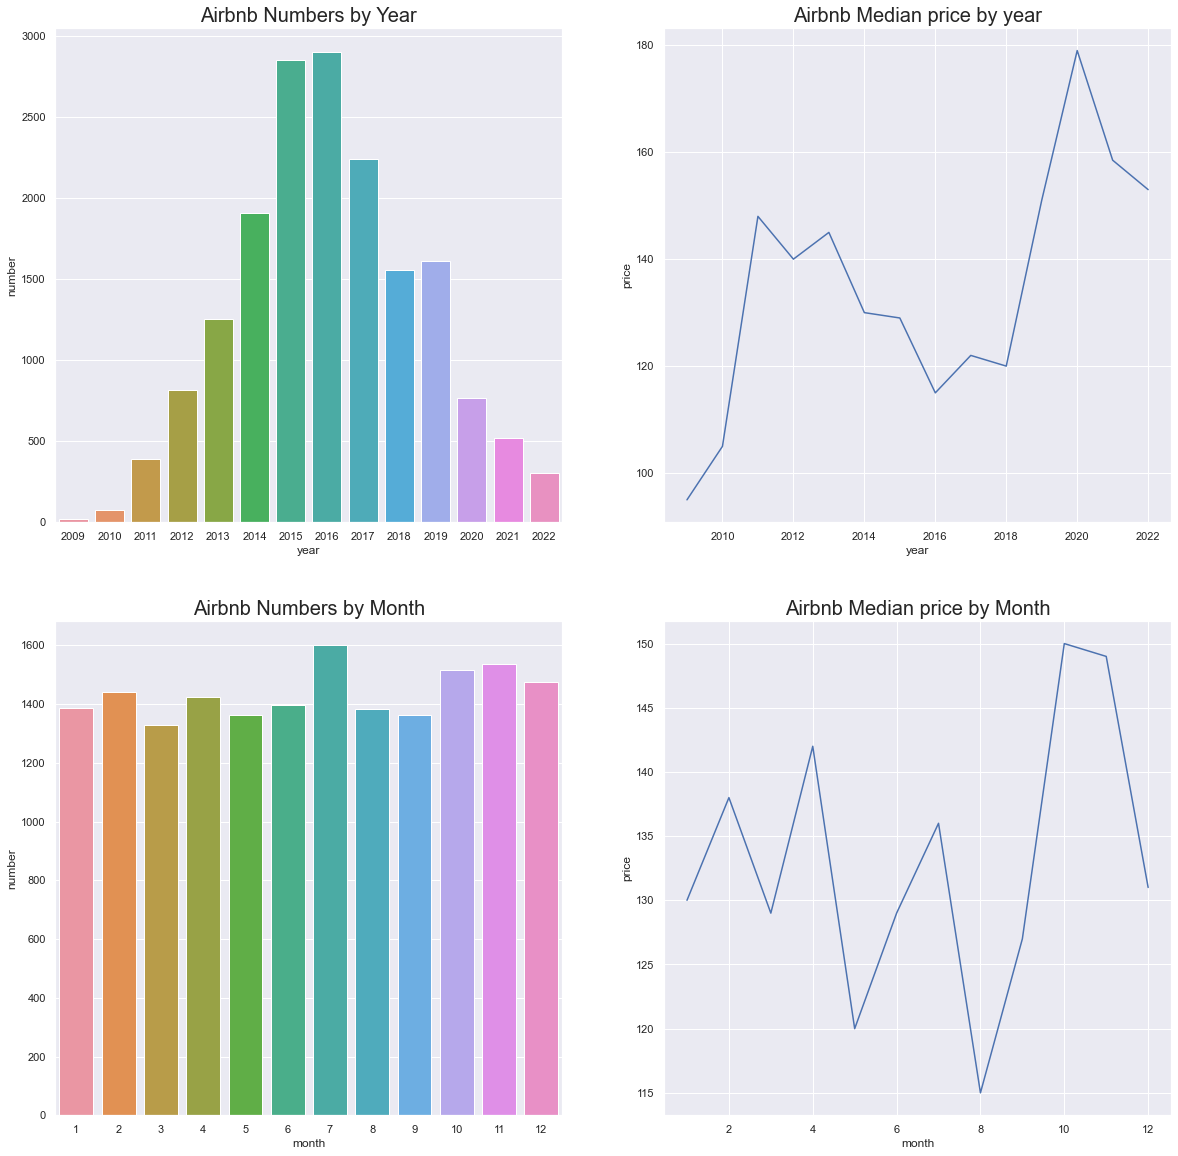

In [39]:
fig,axs = plt.subplots(2,2,figsize=(20,20))
sns.barplot(x='year',y='number',data=count_year,ax=axs[0,0])
axs[0,0].set_title('Airbnb Numbers by Year',fontsize=20)
sns.lineplot(x='year',y='price',data=price_year,ax=axs[0,1])
axs[0,1].set_title('Airbnb Median price by year',fontsize=20)

sns.barplot(x='month',y='number',data=count_month,ax=axs[1,0])
axs[1,0].set_title('Airbnb Numbers by Month',fontsize=20)
sns.lineplot(x='month',y='price',data=price_month,ax=axs[1,1])
axs[1,1].set_title('Airbnb Median price by Month',fontsize=20)


If the number of airbnb was rising when registered, the price tended to fall. The number of Airbnbs increased substantially starting in 2011 and peaked in 2016. However, half pass 2022, the number of airbnbs has dropped to pre-2011 levels.

The median airbnb price in 2016 was the lowest from 2009 to the present. From 2011-2017 prices fell when the number of airbnbs rose, and prices rose when the number of airbnb registrations fell.

In addition, airbnb always has the most listings in July, and the median price fluctuates up and down seasonally.

### Distribution by Host

Text(0, 0.5, 'Number of listings of each hosts')

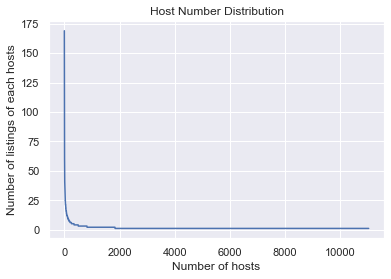

In [80]:
df_host = df_melb[['id','host_is_superhost','host_listings_count','year','month']]
df_host_sub = df_list[['id','host_id','neighbourhood','price']]
df_host = df_host.merge(df_host_sub,on='id',how='right')
df_host = df_host[df_host['price']<=910.28] # 17217

host = df_host['host_id'].value_counts().reset_index()
host = host.rename(columns={'index':'host_id','host_id':'host_number'})

host['host_number'].plot()
plt.title('Host Number Distribution')
plt.xlabel('Number of hosts')
plt.ylabel('Number of listings of each hosts')

Over 10,000 hosts have only 1 Airbnb listing. Less than 2000 hosts with 2 airbnbs.

In [41]:
listnumber = [10,2]
hostnumber = []
pencentagelist = []
i = 0
for number in listnumber:
    host_number = host[host['host_number']>number]['host_id'].count() # 2 / 11027
    if number != listnumber[0]:
        host_number = host_number - hostnumber[i-1]
    hostnumber.append(host_number)
    pencentagelist.append(host_number / 11027)
    i = i + 1 

host_dict = {'host_number':hostnumber,'percentage':pencentagelist,'listingnumber':listnumber}
test_df = pd.DataFrame(host_dict)
test_df

,host_number,percentage,listingnumber
0,117,0.010610,10
1,702,0.063662,2


In [42]:
over10 = host[host['host_number']>10]
over10 = below.merge(over10,on='host_id',how='right')

between = host[(host['host_number']>=2)&((host['host_number']<10))]
between = below.merge(between,on='host_id',how='right')

only1 = host[host['host_number']<2]
only1 = below.merge(only1,on='host_id',how='right')

Text(0.5, 1.0, 'owning 1 listing')

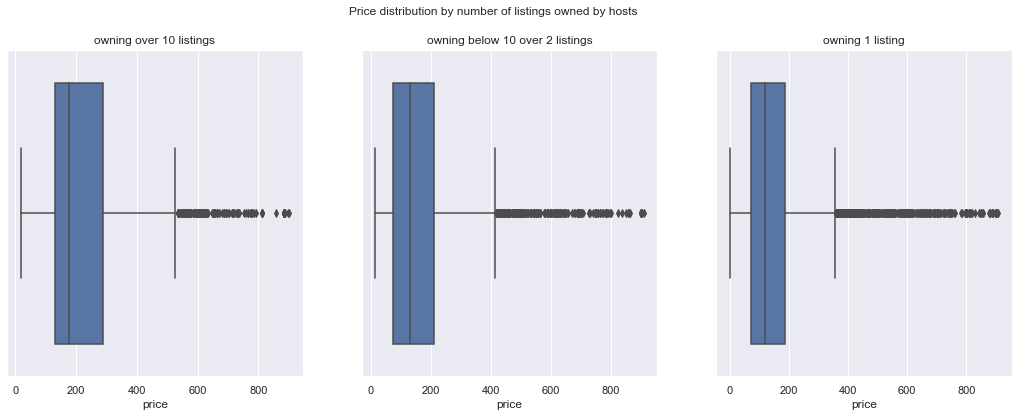

In [43]:
fig,axs = plt.subplots(1,3,figsize=(18,6))
fig.suptitle("Price distribution by number of listings owned by hosts")
sns.boxplot(x='price',data=over10,ax = axs[0]).set_title('owning over 10 listings')
sns.boxplot(x='price',data=between,ax = axs[1]).set_title('owning below 10 over 2 listings')
sns.boxplot(x='price',data=only1,ax = axs[2]).set_title('owning 1 listing')

About 10,000 hosts have only 1 airbnb home, and median price of 75% of them were less than 200. But 117 hosts have more than 10 listings, accounting for 1%,  price of more than 50% of them were over 200 a night

Text(0, 0.5, 'median price by year')

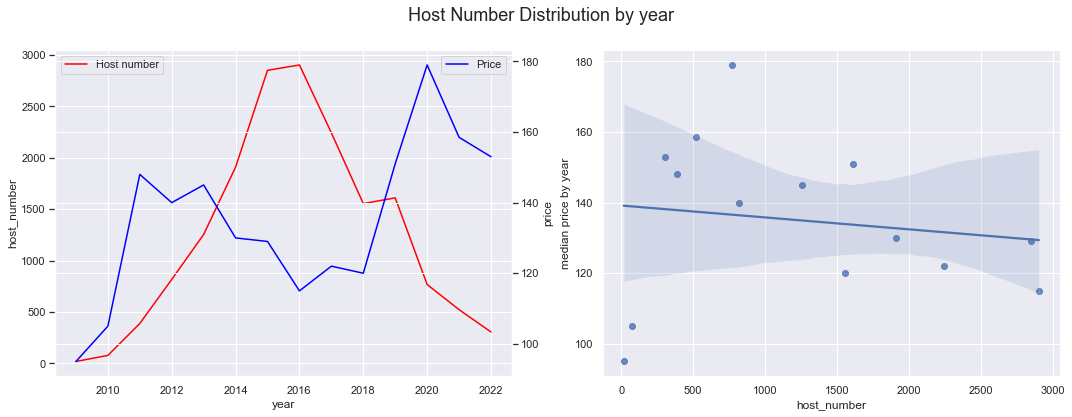

In [81]:
host_year = df_host.groupby(['year'])['host_id'].count().reset_index()
host_year = host_year.rename(columns={'host_id':'host_number'})
test = host_year.merge(price_year,on='year',how='left')

fig,axs = plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Host Number Distribution by year',fontsize=18)
sns.lineplot(x='year',y='host_number',color='red',label='Host number',data=test,ax = axs[0]).legend(loc='upper left',frameon=True)
axs2 = axs[0].twinx()
sns.lineplot(x='year',y='price',color='blue',label='Price',data=test,ax=axs2).legend(loc='upper right',frameon=True)
sns.regplot(x='host_number',y='price',data=test,ax=axs[1])
axs[1].set_ylabel('median price by year')

The number of airbnb host and the number of airbnbs had the similar distribution trends by year. One possible reason for the lowest price in 2016 was due to the highest number of host in the same year.

Text(0, 0.5, 'median price by month')

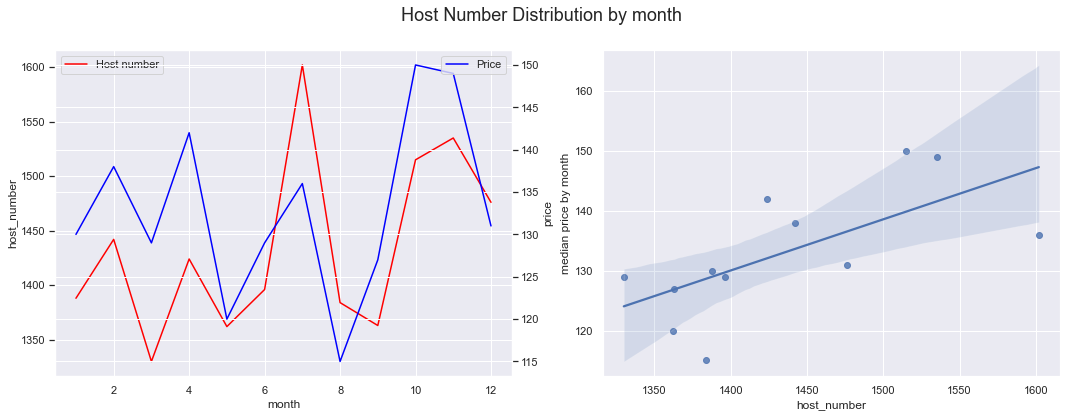

In [82]:
host_month = df_host.groupby(['month'])['host_id'].count().reset_index()
host_month = host_month.rename(columns={'host_id':'host_number'})
test1 = host_month.merge(price_month,on='month',how='left')

fig,axs = plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Host Number Distribution by month',fontsize=18)
sns.lineplot(x='month',y='host_number',color='red',label='Host number',data=test1,ax = axs[0]).legend(loc='upper left',frameon=True)
axs2 = axs[0].twinx()
sns.lineplot(x='month',y='price',color='blue',label='Price',data=test1,ax=axs2).legend(loc='upper right',frameon=True)
sns.regplot(x='host_number',y='price',data=test1,ax=axs[1])
axs[1].set_ylabel('median price by month')

The number of airbnb host and the median price of airbnbs had the similar distribution trends by month. Possible reason for the lower price in March, May and August was due to the lower number of host in the same months. School holidays,pubic holidays do not happen in these months.

## Feature analysis

#### Host

Text(0.5, 1.0, 'Median price required by Superhost or not')

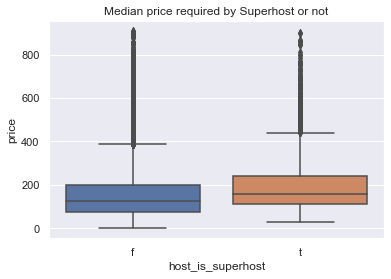

In [83]:
sns.boxplot(y='price',x='host_is_superhost',data=df_host).set_title('Median price required by Superhost or not') # f: 14248  t: 2966

Most features related with host had many missing values expect 'host_is_superhost'. We can see that the median price of airbnb with superhost was more expensive than those who were not superhost.

#### Room type

In [47]:
room_list = df_region['room_type'].unique().tolist()

(-38.4, -37.36)

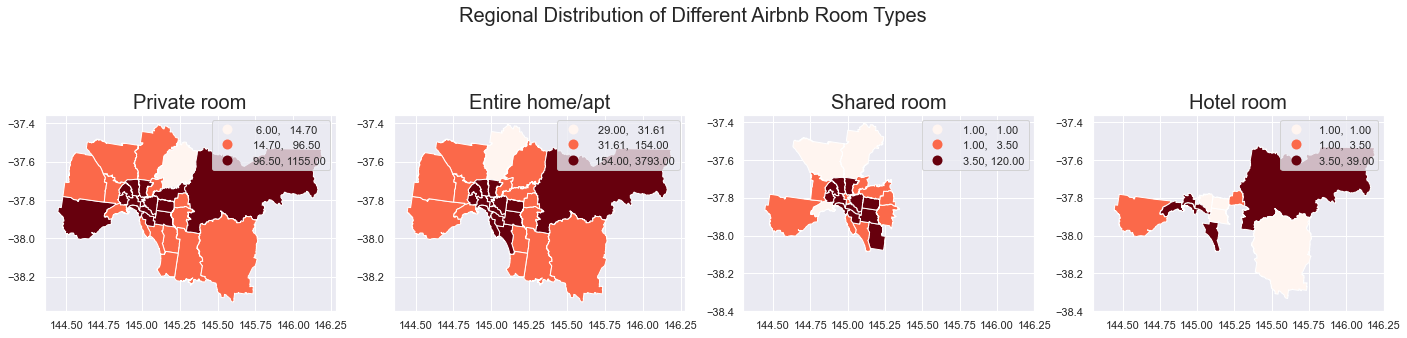

In [48]:
# Airbnb number distribution by regions.
title = []
roomtypelist = []
for roomtype in room_list:
    dataframe = df_region[df_region['room_type']==roomtype]
    roomtypelist.append(get_Countmap(dataframe,melb_map))
    title.append(roomtype)
    
classification = [1,50,100]
color = 'Reds'

fig,axs = plt.subplots(1,4,figsize=(24,6))
fig.suptitle('Regional Distribution of Different Airbnb Room Types',fontsize=20)
for index,df in enumerate(roomtypelist):
    draw_countmap(df,axs[index],classification,color,title[index])
axs[2].set_xlim(144.3,146.25)
axs[2].set_ylim(-38.4,-37.36)
axs[3].set_xlim(144.3,146.25)
axs[3].set_ylim(-38.4,-37.36)

From the previous pictures, we knew that the median price of a hotel room was the most expensive. And most hotel rooms were only available in Melbourne's north-east, which may be one reason median price of airbnb in this areas was higher than other places. Another reason was that the most entire aribnb rooms and private rooms were also located in northeast Melbourne.

Please note that most shared room were only found in Melbourne's central south.

In [49]:
# Filter data
neighbourhood = df_region[['id','neighbourhood','year']]
df_room = df_room.merge(neighbourhood,on='id',how='left')

In [50]:
# Convert string text of bathroom_text to int 
df_room['bath'] = df_room['bathrooms_text'].apply(lambda x:get_bath_number(x))   
df_room['bath'] = df_room['bath'].astype(int)
# Divided in 2 groups, 'only 1' and 'more than 1'
df_room['bath_type'] = df_room['bath'].apply(lambda x: 'Only 1' if x<2 else 'More than 1')

In [51]:
# Filter the bathroom text containing 'share', marked  'shared bathroom' in the new column. 
df_room['shared_bath'] = df_room['bathrooms_text'].apply(lambda x: 'Shared bathroom'if 'share' in x else 'Private bathroom')
# Marked all airbnb with shared room type as shared bathroom.
df_room.loc[df_room[df_room['bedrooms']<df_room['bath']].index.tolist(),'shared_bath'] = 'Shared bathroom'

In [52]:
# get the list of regions who have top 4 records
region_list = df_room['neighbourhood'].value_counts().sort_values(ascending=False)[:4].index.tolist()

# filter data of 4 regions (['Melbourne', 'Port Phillip', 'Yarra', 'Stonnington'])
regiondf_list=[]
for councilarea in region_list:
    regiondf_list.append(df_room[df_room['neighbourhood']==councilarea])
df_region_test = pd.concat(regiondf_list)

In [53]:
# Filter room type as entire/apt and year 2019

df_test = df_region_test[(df_region_test['room_type']=='Entire home/apt') & (df_region_test['year'] == 2019)]
df_mp = df_test.groupby(['neighbourhood','bath_type'])['price'].median().reset_index()
df_mp
df_mp = df_mp.rename(columns={'price':'median_price'})
df_rp = df_test.merge(df_mp,on=['neighbourhood','bath_type'],how='left')

In [54]:
filt = (df_region_test['room_type']=='Entire home/apt') | (df_region_test['room_type']=='Private room') 
df_test = df_region_test[filt]
df_test = df_test[df_test['year'] == 2019]

df_bp = df_test.groupby(['neighbourhood','shared_bath'])['price'].median().reset_index()
df_bp = df_bp.rename(columns={'price':'median_price'})

df_sp = df_test.merge(df_bp,on=['neighbourhood','shared_bath'],how='left')

[Text(0.5, 1.0, 'Airbnb median price of shared bath or not in regions')]

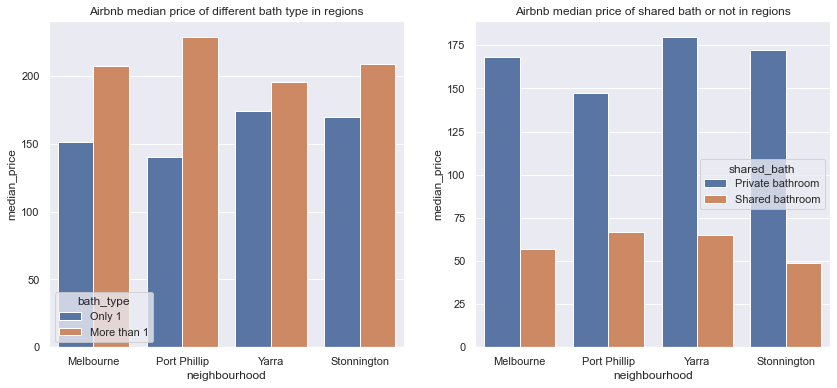

In [55]:
fig,axs=plt.subplots(1,2,figsize=(14,6))
sns.barplot(x='neighbourhood',y='median_price',hue='bath_type',ax=axs[0],data=df_rp).set(title='Airbnb median price of different bath type in regions')
sns.barplot(x='neighbourhood',y='median_price',hue='shared_bath',ax=axs[1],data=df_sp).set(title='Airbnb median price of shared bath or not in regions')

I was trying to figure out why different room types have different prices. There were many features related to room detais, I chose bathroom number and type to analyze. Because the median price on airbnb varies from year to year, I fixed one year first. Besides, Hotel rooms and shared rooms were located in specific areas of Melbourne, which means that the whole home/apartment was a better choice to study regional distribution. At last, I only kept data for the top 4 recorded areas.

Finally, We can see that in these areas, rooms with more than 1 bathroom are more expensive than rooms with only 1 bathroom. A room with a private bathroom was more expensive than a room with a shared bathroom.

75% of the entire house/apartment had more than 1 bathroom, and the entire house/apartment or hotel room offered a private bathroom rather than a shared bathroom, resulting in their higher median prices than private and shared rooms. So, the room type does affect the price.

#### Year

In [56]:
year_list = df_region['year'].unique().tolist()
year_list.sort()

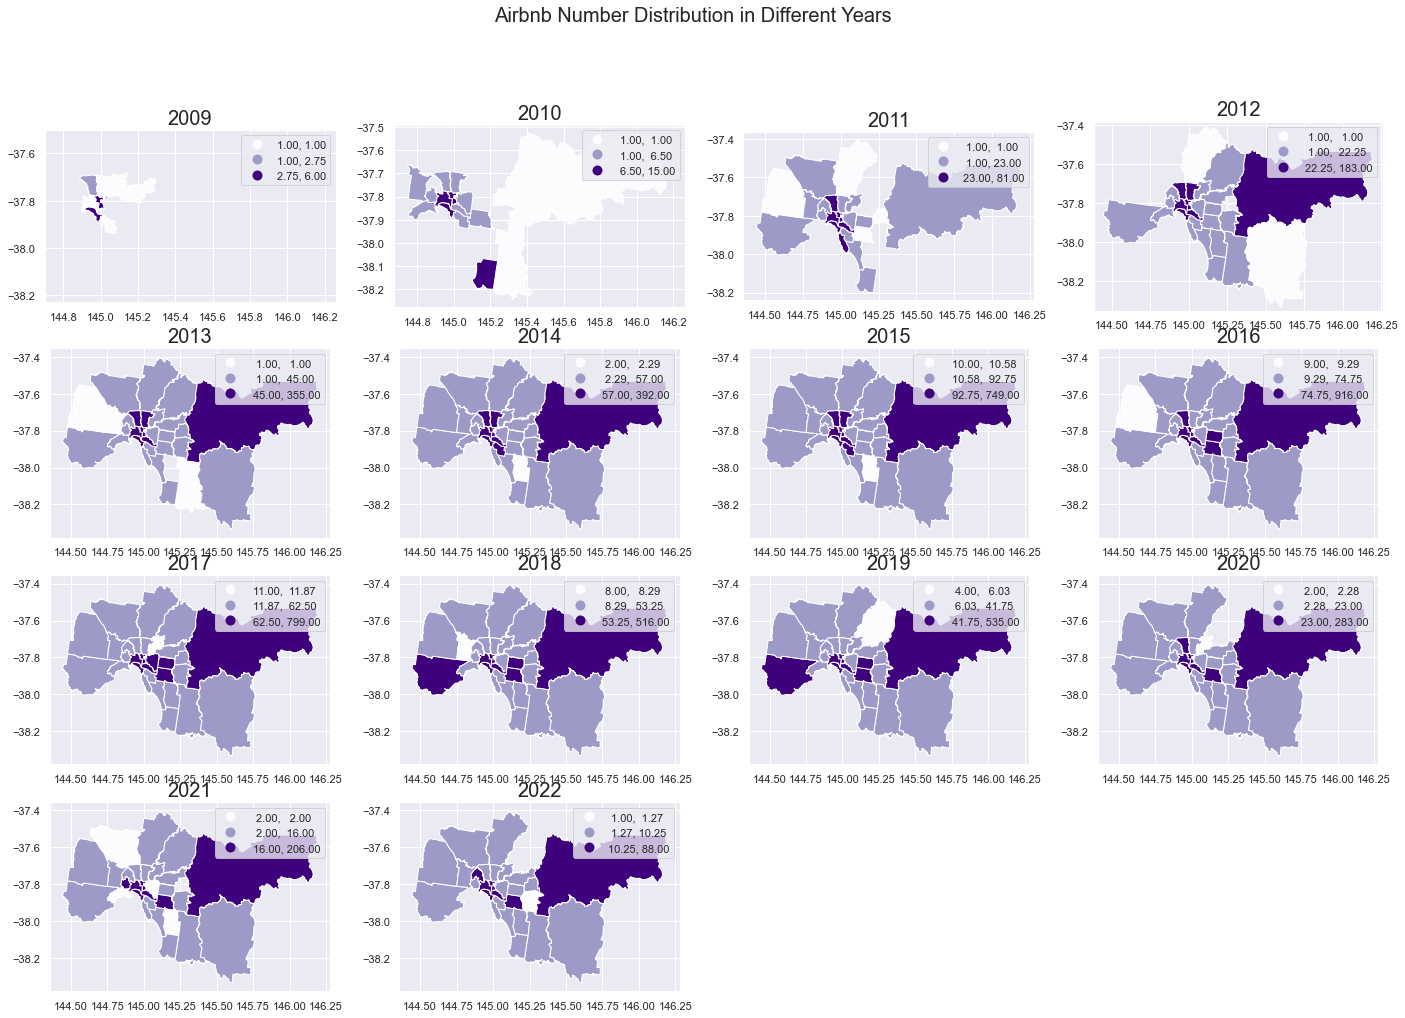

In [57]:
#Airbnb number distribution by year
title = []
dataframe_list = []
for year in year_list:
    dataframe_year = df_region[df_region['year']==year]
    dataframe_list.append(get_Countmap(dataframe_year,melb_map))
    title.append(year)
    
classification = [1,75,100]
color = 'Purples'

fig,axs = plt.subplots(4,4,figsize=(24,16))
fig.suptitle('Airbnb Number Distribution in Different Years',fontsize=20)
j = 0
for index,data in enumerate(dataframe_list):
    i = index % 4
    draw_countmap(data,axs[j,i],classification,color,title[index])
    if i == 3:
        j+=1
axs[0,0].set_xlim(144.7, 146.26)
axs[0,0].set_ylim(-38.23, -37.5)
axs[0,3].set_xlim(144.38, 146.26)
axs[0,3].set_ylim(-38.35, -37.38)
axs[3,2].set_axis_off()
axs[3,3].set_axis_off()

In 2009, airbnbs began to appear in the city center and southern coastal areas. A year later, more than ten airbnbs appeared in the eastern and southern coastal areas. Since 2013, they have developed to all melbourne, with the most in the eastern area for nearly 10 years except 2019. Nillumbik data was missing in 2019. Starting in 2019, northern regions such as Banyule have airbnb for one year and no airbnb for the next year

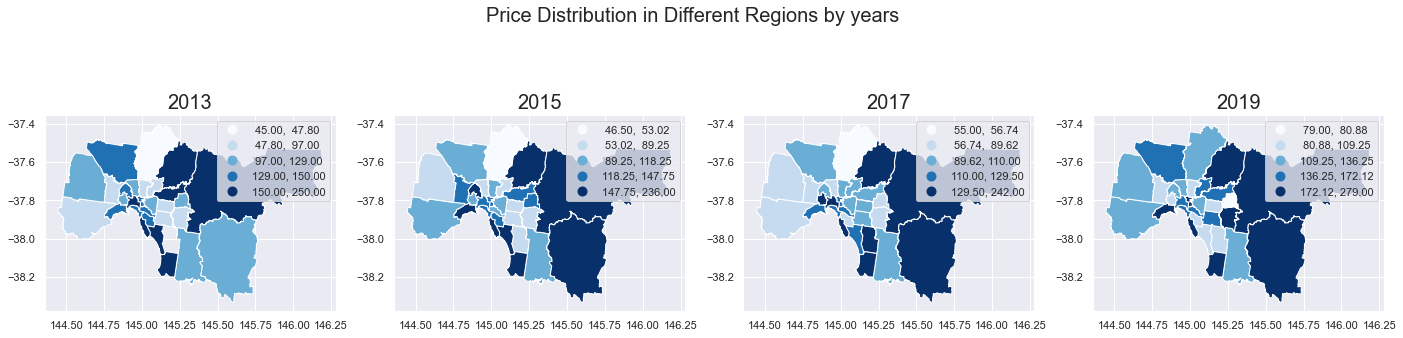

In [58]:
# Private and Entire home/apartment price distribution in regions by year.
title = []
ylist = [2013,2015,2017,2019]
roomtypelist = []
df_r = df_region[(df_region['room_type']=='Entire home/apt')|(df_region['room_type']=='Private room')]

for year in ylist:
    dataframe = df_r[df_r['year']==year]
    roomtypelist.append(get_Pricemap(dataframe,melb_map))
    title.append(year)
    
classification = [1,25,50,75,100]
color = 'Blues'

fig,axs = plt.subplots(1,4,figsize=(24,6))
fig.suptitle('Price Distribution in Different Regions by years',fontsize=20)
for index,df in enumerate(roomtypelist):
    draw_pricemap(df,axs[index],classification,color,title[index])

Since Airbnb has been available in every council area since 2011, I've selected data from 2013, 2015, 2017 and 2019 to see how prices were distributed within the area. Median airbnb prices in the east were consistently higher than others but the southern coast and remained unchanged from 2013 to 2019. Obviously, region wa related with price.

## Modelling

In [85]:
# target price below $400
df_info = df_list[['id','neighbourhood','room_type','price']]
df_whole = majority[['id','host_id','host_listings_count','host_is_superhost','number_of_reviews','instant_bookable','minimum_nights','accommodates','days']]
df_model = df_info.merge(df_whole,on='id',how='right')
df_model.count() # 16053

id                     16053
neighbourhood          16053
room_type              16053
price                  16053
host_id                16053
host_listings_count    16053
host_is_superhost      16053
number_of_reviews      16053
instant_bookable       16053
minimum_nights         16053
accommodates           16053
days                   16053
dtype: int64

In [86]:
x_df = df_model.loc[:,df_model.columns !='price']
y_df = df_model[['price']]

In [87]:
#Label enconding
x_df = x_df.apply(LabelEncoder().fit_transform)
x_df

,id,neighbourhood,room_type,host_id,host_listings_count,host_is_superhost,number_of_reviews,instant_bookable,minimum_nights,accommodates,days
0,192,14,2,1157,1,0,1,1,0,1,629
1,193,28,0,1191,1,0,47,0,13,1,642
2,94,24,0,96,1,0,17,0,1,1,83
3,0,14,2,4,1,0,4,0,0,1,4
4,194,29,0,1198,3,0,54,1,0,9,645
...,...,...,...,...,...,...,...,...,...,...,...
16048,12599,7,0,8352,0,1,52,1,0,1,2316
16049,13406,7,2,8352,0,1,26,1,0,1,2316
16050,12666,7,0,3472,36,0,2,0,1,3,1275
16051,8694,7,0,3472,36,0,2,0,6,5,1275


In [88]:
#split test and training data
X_train, X_test,Y_train,Y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=5)


In [89]:
#data scaling
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [90]:
# choose random forest regression model
from sklearn.feature_selection import RFECV
rf = RandomForestRegressor() 
rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='r2')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, Y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_df.columns[rfecv.support_])

Optimal number of features : 11
Best features : Index(['id', 'neighbourhood', 'room_type', 'host_id', 'host_listings_count',
       'host_is_superhost', 'number_of_reviews', 'instant_bookable',
       'minimum_nights', 'accommodates', 'days'],
      dtype='object')


In [65]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# to get cross validation result
def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

# to evaluation
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [91]:
x_df1 = x_df[x_df.columns[rfecv.support_]]
X_train1,X_test1 = train_test_split(x_df1,test_size=0.2,random_state=6) #3444 #13773

In [92]:
regr = RandomForestRegressor(n_estimators = 60,random_state=0)
regr.fit(X_train1, Y_train)

test_pred = regr.predict(X_test1)
train_pred = regr.predict(X_train1)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 71.87034672480017
MSE: 8072.033925481851
RMSE: 89.8444985821717
R2 Square -0.09842151601774063
Train set evaluation:
_____________________________________
MAE: 26.588062607070547
MSE: 1136.7302002976344
RMSE: 33.71542970655475
R2 Square 0.8449625324722246


Testing data result looks overfitting,which means the model wasn't good.

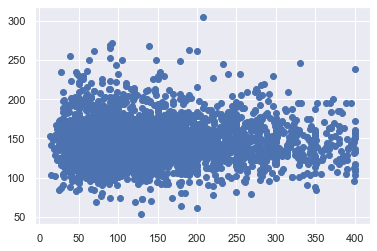

In [93]:
plt.scatter(Y_test, test_pred)

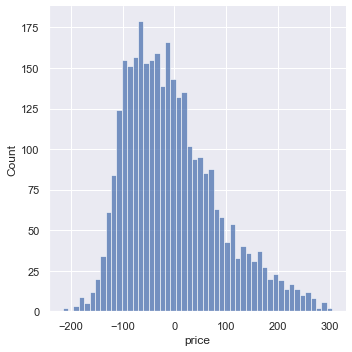

In [112]:
sns.displot((Y_test['price'] - test_pred), bins=50);

In [114]:
Y_test['Pred'] = test_pred
abnormal2 = Y_test[abs(Y_test['price'] - Y_test['Pred'])>100] #814
new_model = df_model.drop(abnormal2.index) #15239

id                     15239
neighbourhood          15239
room_type              15239
price                  15239
host_id                15239
host_listings_count    15239
host_is_superhost      15239
number_of_reviews      15239
instant_bookable       15239
minimum_nights         15239
accommodates           15239
days                   15239
dtype: int64

In [96]:
x_df_new = new_model.loc[:,new_model.columns !='price']

y_df_new = new_model[['price']]

In [97]:
x_df_new = x_df_new.apply(LabelEncoder().fit_transform)
x_df_new

,id,neighbourhood,room_type,host_id,host_listings_count,host_is_superhost,number_of_reviews,instant_bookable,minimum_nights,accommodates,days
0,178,14,2,1111,1,0,1,1,0,1,617
1,179,28,0,1144,1,0,47,0,13,1,630
2,88,24,0,94,1,0,17,0,1,1,82
3,0,14,2,4,1,0,4,0,0,1,4
4,180,29,0,1151,3,0,54,1,0,9,633
...,...,...,...,...,...,...,...,...,...,...,...
16048,11967,7,0,8019,0,1,52,1,0,1,2293
16049,12742,7,2,8019,0,1,26,1,0,1,2293
16050,12031,7,0,3340,36,0,2,0,1,3,1259
16051,8287,7,0,3340,36,0,2,0,6,5,1259


In [98]:
X_train_new, X_test_new,Y_train_new,Y_test_new = train_test_split(x_df_new,y_df_new,test_size=0.2,random_state=5)

In [99]:
regr1 = RandomForestRegressor(n_estimators = 60,random_state=0)
regr1.fit(X_train_new, Y_train_new)

test_pred1 = regr1.predict(X_test_new)
train_pred1 = regr1.predict(X_train_new)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test_new, test_pred1)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train_new, train_pred1)

Test set evaluation:
_____________________________________
MAE: 38.21777668416448
MSE: 2971.336885115923
RMSE: 54.50997051105351
R2 Square 0.5485946328168005
Train set evaluation:
_____________________________________
MAE: 14.712841440406857
MSE: 438.4507228237589
RMSE: 20.939214952422617
R2 Square 0.9347226500322138


max score：0.5366103239271836 estimators：91


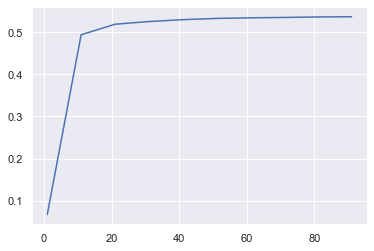

In [100]:
score_lt = []

for i in range(0,100,10):
    rfc = RandomForestRegressor(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train_new, Y_train_new, cv=5,scoring='r2').mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max score：{}'.format(score_max),
      'estimators：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,101,10)

plt.subplot(111)
plt.plot(x, score_lt)
plt.show()

In [101]:
rfc = RandomForestRegressor(n_estimators=60, random_state=90)

# 用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train_new, Y_train_new)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 17} 0.5359420484117146


In [109]:
regr2 = RandomForestRegressor(n_estimators = 80,max_depth=20,random_state=0)
regr2.fit(X_train_new, Y_train_new)

test_pred2 = regr2.predict(X_test_new)
train_pred2 = regr2.predict(X_train_new)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test_new, test_pred2)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train_new, train_pred2)

Test set evaluation:
_____________________________________
MAE: 38.26238857451846
MSE: 2971.3072037831294
RMSE: 54.50969825437607
R2 Square 0.548599142003556
Train set evaluation:
_____________________________________
MAE: 17.74679429290329
MSE: 601.6042424207276
RMSE: 24.527622029473783
R2 Square 0.9104320539793287


<AxesSubplot:>

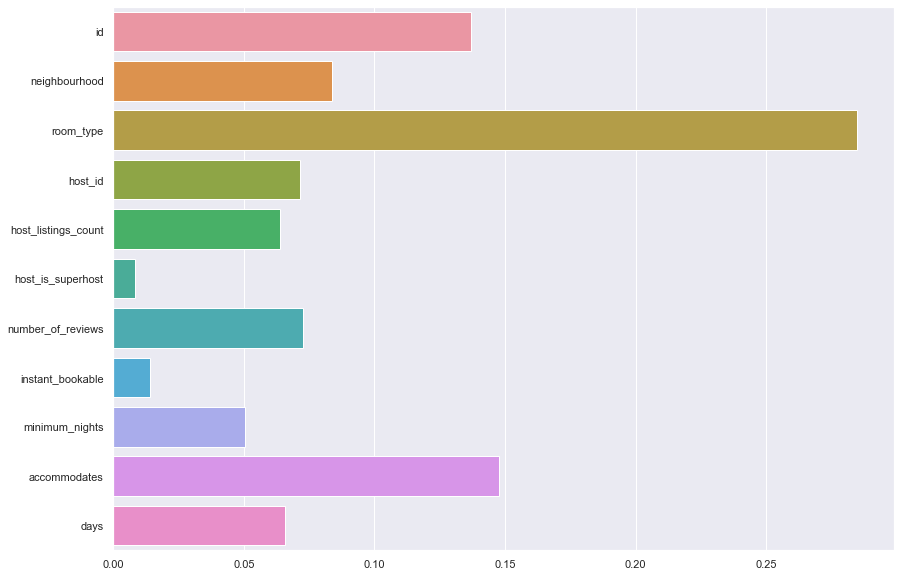

In [111]:
importance = regr1.feature_importances_
importance
plt.figure(figsize=(14,10))
sns.barplot(x=importance, y=x_df_new.columns)